In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
a = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.jpg")
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
b = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\GroundT_FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.png")
b = cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
c = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.jpg")
d = cv2.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\SkinColor\GroundT_FacePhoto\Megan-Fox-Pretty-Face-1-1024x768.png")

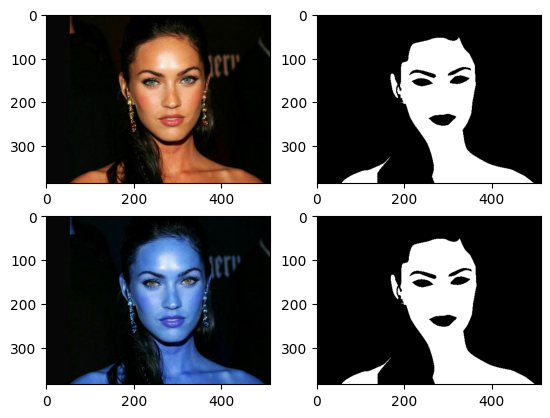

In [30]:
plt.subplot(221)
plt.imshow(a)
plt.subplot(222)
plt.imshow(b)
plt.subplot(223)
plt.imshow(c)
plt.subplot(224)
plt.imshow(d)